# Chapter 2: Exercises

Course repo: https://github.com/mikexcohen/LinAlg4DataScience/tree/main

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

## Ex 1
Produce the graph from vector addition and subsraction in P13

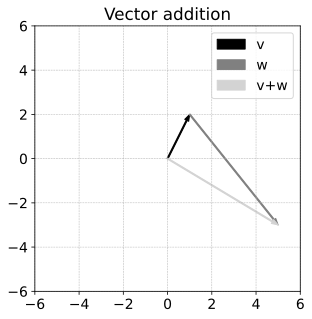

In [3]:
v = np.array([1, 2])
w = np.array([4, -5])
vPlusw = v + w

# Plot v
v_plot = plt.arrow(0, 0,v[0],v[1],head_width=.2,width=.05,color='black', length_includes_head=True)

# Plot w
w_plot = plt.arrow(v[0],v[1],w[0],w[1],head_width=.2,width=.05,color='grey', length_includes_head=True)

# Plot v + W
vPlusw_plot = plt.arrow(0, 0,vPlusw[0],vPlusw[1],head_width=.2,width=.05,color='lightgrey', length_includes_head=True)

# add axis lines
plt.grid(linestyle='--',linewidth=.5)

# make the plot look nicer
plt.axis('square')
plt.axis([-6,6,-6,6])
#plt.xlabel('$v_0$')
#plt.ylabel('$v_1$')
plt.title('Vector addition')
plt.legend([v_plot,w_plot,vPlusw_plot],['v','w','v+w'])
plt.show()

## Ex 2
Write an algorithm that computes the norm of a vector by translating Equation
2-7 into code. Confirm, using random vectors with different dimensionalities and
orientations, that you get the same result as np.linalg.norm().

This exercise is designed to give you more experience with indexing NumPy arrays and translating
formulas into code; in practice, it’s often easier to use np.linalg.norm().

In [4]:
v = np.array([1,2,3]) 

def vector_magnitude(v):
    # Add all squared elements 
    addition = np.sum(v**2)

    magnitude = np.sqrt(addition)

    return magnitude

print(vector_magnitude(v))
print(np.linalg.norm(v))

3.7416573867739413
3.7416573867739413


## Ex 3
 Create a Python function that will take a vector as input and output a unit vector in
 the same direction. What happens when you input the zeros vector?

In [5]:
v = np.array([3, 4 , 5]) 

def create_unit_vector(v): 
    magnitude = np.linalg.norm(v)
    unit_v = v / magnitude

    return unit_v

print(f'Original vector: {v}')
print(f'Original magnitude: {np.linalg.norm(v)}')
print(f'Unit vector: {create_unit_vector(v)}')
print(f'Unit vector magnitude: {np.linalg.norm(create_unit_vector(v))}')

Original vector: [3 4 5]
Original magnitude: 7.0710678118654755
Unit vector: [0.42426407 0.56568542 0.70710678]
Unit vector magnitude: 0.9999999999999999


## Ex 4

 You know how to create unit vectors; what if you want to create a vector of any
 arbitrary magnitude? Write a Python function that will take a vector and a desired
 magnitude as inputs and will return a vector in the same direction but with a
 magnitude corresponding to the second input.

In [6]:
def re_scale_vector(original_vector, new_magnitude): 
    # Get original vector magnitude
    original_magnitude = np.linalg.norm(original_vector)
    # Define a re scale factor 
    re_scale_factor = new_magnitude / original_magnitude

    # Re-scale the vector by that factor 
    new_vector = re_scale_factor * original_vector 

    return new_vector

v = np.array([1,0,0])

v_new = re_scale_vector(v, 4)

print(v_new)
print(f'New vector magnitude {np.linalg.norm(v_new)}')

[4. 0. 0.]
New vector magnitude 4.0


## Ex 5

 Write a for loop to transpose a row vector into a column vector without using a
 built-in function or method such as np.transpose() or v.T. This exercise will help
 you create and index orientation-endowed vectors.

In [7]:
def vector_transposed(v): 
    # Get new dimension
    rows = v.shape[0] 

    # Create a new zero vector with the same dimenstion 
    # This create a column vector of rows x 1
    v_transposed = np.zeros((rows, 1))

    position = 0
    # Loop through components of vector
    for component in v: 
        # Replace values of the transposed version 
        v_transposed[position, 0] = component
        # Move to next element position
        position += 1

    return v_transposed

    
v = np.array([1,2,3])

print(vector_transposed(v))

[[1.]
 [2.]
 [3.]]


# Ex 6 Check that the dot product of a vector with itself is the magnitude squared 

In [8]:
# We want to prove that 
# a * a = |a|**2

# Define a vector 
a = np.array([5, 2])

# Compute magnitude squared 
mag_sq = np.linalg.norm(a)**2

print(f'Magnitude squared = {mag_sq}')

# Compute dot product 
dot_product = np.dot(a, a)

print(f'Dot product = {dot_product}')

Magnitude squared = 28.999999999999996
Dot product = 29


# Ex 7 Check that the dot product is conmutative

In [9]:
# We want to prove that 
# a * b = b * a

# Define a vector 
a = np.array([5, 2])

b = np.array([2, 5])

# First product 
dot_1 = np.dot(a, b) 

# Second dot product 
dot_2 = np.dot(b, a)

print(dot_1) 
print(dot_2)


20
20


## Ex 8

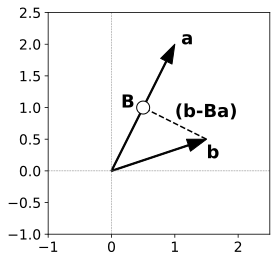

In [10]:
# the vectors a and b
a = np.array([1,2])
b = np.array([1.5,.5])

# compute beta
beta = np.dot(a,b) / np.dot(a,a)

# compute the projection vector (not explicitly used in the plot)
projvect = b - beta*a


# draw the figure
plt.figure(figsize=(4,4))

# vectors
plt.arrow(0,0,a[0],a[1],head_width=.2,width=.02,color='k',length_includes_head=True)
plt.arrow(0,0,b[0],b[1],head_width=.2,width=.02,color='k',length_includes_head=True)

# projection vector
plt.plot([b[0],beta*a[0]],[b[1],beta*a[1]],'k--')

# projection on a
plt.plot(beta*a[0],beta*a[1],'ko',markerfacecolor='w',markersize=13)

# make the plot look nicer
plt.plot([-1,2.5],[0,0],'--',color='gray',linewidth=.5)
plt.plot([0,0],[-1,2.5],'--',color='gray',linewidth=.5)

# add labels
plt.text(a[0]+.1,a[1],'a',fontweight='bold',fontsize=18)
plt.text(b[0],b[1]-.3,'b',fontweight='bold',fontsize=18)
plt.text(beta*a[0]-.35,beta*a[1],r'B',fontweight='bold',fontsize=18)
plt.text((b[0]+beta*a[0])/2,(b[1]+beta*a[1])/2+.1,r'(b-Ba)',fontweight='bold',fontsize=18)

# some finishing touches
plt.axis('square')
plt.axis([-1,2.5,-1,2.5])
plt.show()

## Ex 9 
 Implement orthogonal vector decomposition. Start with two random-number vectors
 t and r, and reproduce Figure 2-8 (note that your plot will look somewhat different
 due to random numbers). Next, confirm that the two components sum to t and that
 t ⊥r and t ∥ r are orthogonal.

Confirm that the sum of our new vectors equals the target: [2.83337403 1.80469493] = [2.83337403 1.80469493]
T2 dot r Should be 0: 0.0


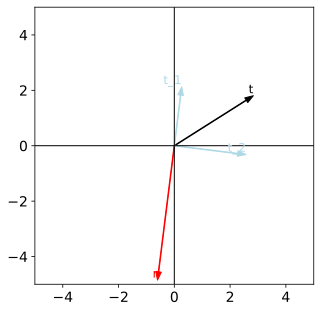

In [11]:
# Create 2 random vectors between -5 and 5
t = np.random.uniform(-5, 5, 2)
r = np.random.uniform(-5, 5, 2)


# Compute dot product 
t_r_dot = np.dot(t, r)

# Compute magnitude of the reference
r_mag = np.linalg.norm(r)

# Compute lenght of target projected in reference 
t_1_mag = t_r_dot / r_mag

# Compute betha 
betha = t_1_mag / r_mag 

# Compute t_1 as a proportion of reference 
t_1 = betha * r

# Compute t2 
t_2 = t - t_1

# Confrirm sum of vectors
print(f'Confirm that the sum of our new vectors equals the target: {t_1 + t_2} = {t}')

# Confirm t1 is perpendicular to the reference 
print(f'T2 dot r Should be 0: {np.round(np.dot(t_2, r), 2)}')

# ----------------------------------------------------------------------------------------------
# Sketch 
plt.figure(figsize=(5,5))

# Plot target and reference
t_graph = plt.arrow(0,0,t[0],t[1],head_width=.2,width=.02,color='k',length_includes_head=True)
r_graph = plt.arrow(0,0,r[0],r[1],head_width=.2,width=.02,color='red',length_includes_head=True)

# Plot t1 and t 2
t_1_graph = plt.arrow(0,0,t_1[0],t_1[1],head_width=.2,width=.02,color='lightblue',length_includes_head=True)
t_2_graph = plt.arrow(0,0,t_2[0],t_2[1],head_width=.2,width=.02,color='lightblue',length_includes_head=True)

# Plot t_2 again starting from the tip of t1
#t_2_graph = plt.arrow(t_1[0],t_1[1],t_2[0],t_2[1],head_width=.2,width=.02,color='lightblue',length_includes_head=True)

plt.axis([-5, 5, -5, 5])

# Add axes
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

# Add labels for the vectors
plt.text(t[0], t[1], 't', fontsize=12, color='k', verticalalignment='bottom', horizontalalignment='right')
plt.text(r[0], r[1], 'r', fontsize=12, color='red', verticalalignment='bottom', horizontalalignment='right')
plt.text(t_1[0], t_1[1], 't_1', fontsize=12, color='lightblue', verticalalignment='bottom', horizontalalignment='right')
plt.text(t_2[0], t_2[1], 't_2', fontsize=12, color='lightblue', verticalalignment='bottom', horizontalalignment='right')

plt.show()


In [12]:
min(t[0], 1)

1